## Simple Linear Regression

### DATA 621 
Vanita Thompson

### Background

Simple Linear Regression is used to predict an outcome (y) on the basis of a single predictor variable (x). The goal is to build a model, or a formula that defines y as a function of x.

After building the model, we can use it to predict future outcomes on the basis of new x values.

The mathematical formula of simple linear regression can be written y = b0 + b1*x + e, where:

b0 and b1 are the regression beta coefficients or parameters.
b0 is the intercept of the regression line, which is the predicted value when x = 0. 
b1 is the slope of the regression line. 
e is the error term (also known as the residual errors), the part of y that can be explained by the regression model

The sum of the squares of the residual errors are called the Residual Sum of Squares or RSS.

The beta coefficients (b0 and b1) are determined so that the RSS is as minimal as possible. This method is known as least squares regression or ordinary least squares (OLS) regression.

After calculating the beta coefficients, a t-test is performed to determine whether the coefficients are significantly different from zero. A non-zero beta coefficient indicates that there is a significant relationship between the predictors (x) and the outcome variable (y).

### Loading Libraries

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the Dataset

This dataset contains yearly salary earned, as well as the years of experience for the salary. We will perform simple linear regression to determine if there is a relationship between Salary and YearsExperience. We will also use this dataset to make a prediction.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Vthomps000/DATA621/main/Salary_Data.csv')

Below, is a preview of the data and a plot that represents the dataset.

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
df.shape

(30, 2)

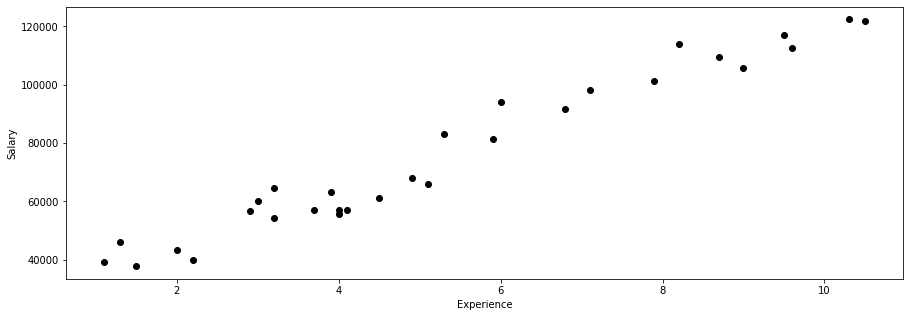

In [6]:
plt.figure(figsize=(15,5))
plt.scatter(df['YearsExperience'], df['Salary'], color='black')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

### Splitting the Data into Testing and Training Sets

In [7]:
X = df['YearsExperience'].values.reshape(-1,1)
y = df['Salary'].values.reshape(-1,1)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Fitting the Data

The simple linear regression will attempt to find the best line to predict Salary based on YearsExperience.

The linear model equation can be written as follow: Salary = b0 + b1 * YearsExperience

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
reg = LinearRegression()

In [12]:
reg.fit(X_train, y_train)

LinearRegression()

### Predicting Test Set Results

In [13]:
y_pred = reg.predict(X_test)

In [14]:
y_pred

array([[ 40748.96184072],
       [122699.62295594],
       [ 64961.65717022],
       [ 63099.14214487],
       [115249.56285456],
       [107799.50275317]])

In [15]:
print(reg.coef_[0][0])

9312.575126729189


In [16]:
print(reg.intercept_[0])

26780.09915062818


In [17]:
from sklearn.metrics import r2_score, mean_squared_error

In [18]:
mean_squared_error(y_pred, y_test)

12823412.298126549

In [19]:
r2_score(y_test, y_pred)

0.988169515729126

### Visualization Test Set Results

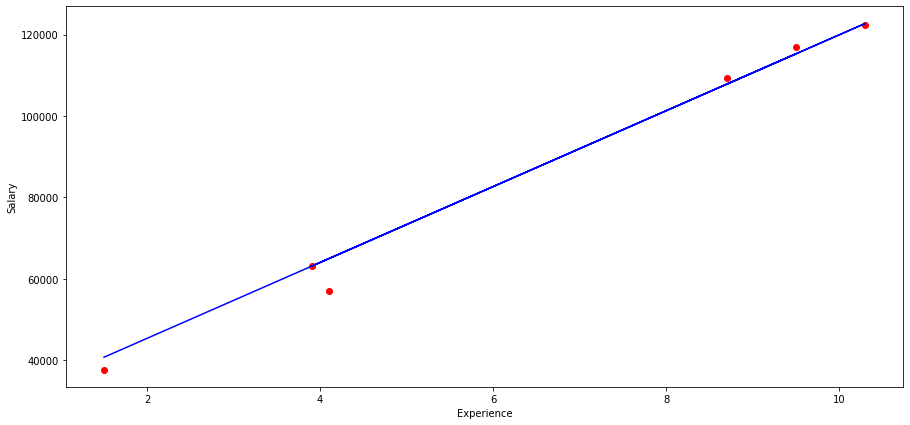

In [20]:
plt.figure(figsize=(15,7))
plt.scatter(X_test,y_test, color='r')
plt.plot(X_test,y_pred, color='b')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

In [21]:
y_test

array([[ 37731.],
       [122391.],
       [ 57081.],
       [ 63218.],
       [116969.],
       [109431.]])

In [22]:
y_pred

array([[ 40748.96184072],
       [122699.62295594],
       [ 64961.65717022],
       [ 63099.14214487],
       [115249.56285456],
       [107799.50275317]])

### Visualising Actual and Predicted Values

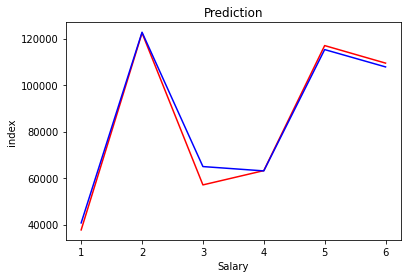

In [23]:
# Plotting the actual and predicted values

c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-')
plt.plot(c,y_pred,color='b',linestyle='-')
plt.xlabel('Salary')
plt.ylabel('index')
plt.title('Prediction')
plt.show()

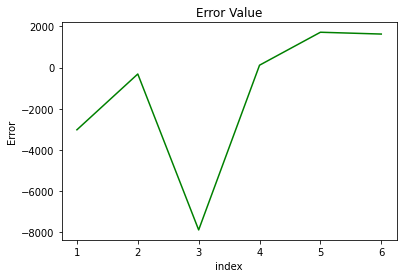

In [24]:
# plotting the error
c = [i for i in range(1,len(y_test)+1,1)]
plt.plot(c,y_test-y_pred,color='green',linestyle='-')
plt.xlabel('index')
plt.ylabel('Error')
plt.title('Error Value')
plt.show()